<a href="https://colab.research.google.com/github/jweir136/carbon_nanotubes/blob/master/carbon_nanotubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

data = pd.read_csv("carbon_nanotubes.csv", sep=';')

In [31]:
data.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373


In [32]:
data.isnull().any()

Chiral indice n                     False
Chiral indice m                     False
Initial atomic coordinate u         False
Initial atomic coordinate v         False
Initial atomic coordinate w         False
Calculated atomic coordinates u'    False
Calculated atomic coordinates v'    False
Calculated atomic coordinates w'    False
dtype: bool

There are no missing values.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10721 entries, 0 to 10720
Data columns (total 8 columns):
Chiral indice n                     10721 non-null int64
Chiral indice m                     10721 non-null int64
Initial atomic coordinate u         10721 non-null float64
Initial atomic coordinate v         10721 non-null float64
Initial atomic coordinate w         10721 non-null float64
Calculated atomic coordinates u'    10721 non-null float64
Calculated atomic coordinates v'    10721 non-null float64
Calculated atomic coordinates w'    10721 non-null float64
dtypes: float64(6), int64(2)
memory usage: 670.1 KB


There are no categorical features.

In [34]:
data.describe()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
count,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000
mean,8.225725,3.337189,0.500064,0.500072,0.499637,0.500064,0.500072,0.499834
std,2.138919,1.683881,0.286524,0.286495,0.288503,0.290935,0.291012,0.289095
min,2.000000,1.000000,0.045149,0.045149,0.000061,0.038504,0.038930,0.000000
25%,7.000000,2.000000,0.218041,0.217594,0.249483,0.213364,0.212922,0.249242
50%,8.000000,3.000000,0.500181,0.500297,0.500057,0.500538,0.500020,0.499755
75%,10.000000,5.000000,0.781959,0.782709,0.749191,0.786588,0.787161,0.749463
max,12.000000,6.000000,0.954851,0.954851,0.999411,0.961496,0.961070,1.000000


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6195836dd8>,
      dtype=object)

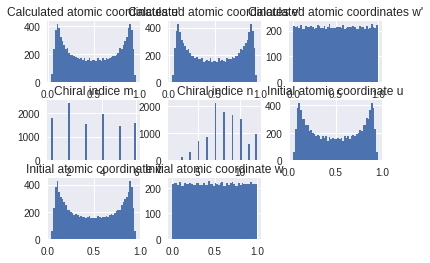

In [36]:
data.hist(bins=50)

In [37]:
data.corr()["Calculated atomic coordinates w'"]

Chiral indice n                     0.001238
Chiral indice m                    -0.002989
Initial atomic coordinate u        -0.001546
Initial atomic coordinate v         0.000110
Initial atomic coordinate w         0.998871
Calculated atomic coordinates u'   -0.001016
Calculated atomic coordinates v'    0.000990
Calculated atomic coordinates w'    1.000000
Name: Calculated atomic coordinates w', dtype: float64

According to the corrlation, most features play little to no importance.  
The most important feature is by far the initial atomic coordinate w'.

In [0]:
X = data.drop(["Calculated atomic coordinates w'"], axis=1).values
Y = data["Calculated atomic coordinates w'"].values

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

np.random.seed(42)

In [0]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.2)

In [0]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=1)),
    ("lr", LinearRegression())
])

In [42]:
params = {
    "poly__degree":[1,2,3,4,5]
}

grid = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid.fit(trainX, trainY)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] poly__degree=1 ..................................................
[CV] ..... poly__degree=1, score=-0.0001883483242265302, total=   0.0s
[CV] poly__degree=1 ..................................................
[CV] .... poly__degree=1, score=-0.00027960987755487317, total=   0.0s
[CV] poly__degree=1 ..................................................
[CV] .... poly__degree=1, score=-0.00014805142320827827, total=   0.0s
[CV] poly__degree=1 ..................................................
[CV] ..... poly__degree=1, score=-0.0002877029717361843, total=   0.0s
[CV] poly__degree=1 ..................................................
[CV] ..... poly__degree=1, score=-0.0001491350762233318, total=   0.0s
[CV] poly__degree=2 ..................................................
[CV] .... poly__degree=2, score=-0.00018897403714195172, total=   0.0s
[CV] poly__degree=2 ..................................................
[CV] .... poly__d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... poly__degree=2, score=-0.00028838631867802067, total=   0.0s
[CV] poly__degree=2 ..................................................
[CV] ..... poly__degree=2, score=-0.0001493716689949366, total=   0.0s
[CV] poly__degree=3 ..................................................
[CV] .... poly__degree=3, score=-0.00019015136192069928, total=   0.2s
[CV] poly__degree=3 ..................................................
[CV] ..... poly__degree=3, score=-0.0002805067216444178, total=   0.1s
[CV] poly__degree=3 ..................................................
[CV] .... poly__degree=3, score=-0.00014993118282409488, total=   0.2s
[CV] poly__degree=3 ..................................................
[CV] .... poly__degree=3, score=-0.00029105962342491584, total=   0.2s
[CV] poly__degree=3 ..................................................
[CV] .... poly__degree=3, score=-0.00015097498200110381, total=   0.1s
[CV] poly__degree=4 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'poly__degree': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [43]:
print(grid.best_params_)
print(np.sqrt(-grid.best_score_))

{'poly__degree': 1}
0.01451092497042188


The polynomial has a degree of 1.

In [0]:
from sklearn.svm import SVR

In [0]:
pipe2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVR(verbose=3))
])

In [0]:
from sklearn.linear_model import Ridge

In [0]:
pipe3 = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

In [59]:
kfold = KFold(n_splits=10, shuffle=True)

score1 = cross_val_score(pipe2, trainX, trainY, cv=kfold, scoring='neg_mean_squared_error', verbose=3)
score2 = cross_val_score(pipe3, trainX, trainY, cv=kfold, scoring='neg_mean_squared_error', verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[LibSVM][CV] ................... , score=-0.0024589256226286017, total=   0.2s
[CV]  ................................................................
[LibSVM][CV] ................... , score=-0.0029196601712940503, total=   0.2s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .................... , score=-0.002413774053370665, total=   0.2s
[CV]  ................................................................
[LibSVM][CV] .................... , score=-0.002120818976468333, total=   0.2s
[CV]  ................................................................
[LibSVM][CV] .................... , score=-0.002258156298105335, total=   0.2s
[CV]  ................................................................
[LibSVM][CV] ................... , score=-0.0023821623358239574, total=   0.3s
[CV]  ................................................................
[LibSVM][CV] ................... , score=-0.0022309293831671824, total=   0.3s
[CV]  ................................................................
[LibSVM][CV] ................... , score=-0.0028227414368096064, total=   0.2s
[CV]  ................................................................
[LibSVM][CV] ................... , score=-0.0023777249507721046, total=   0.2s
[CV]  .......................

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [60]:
print(np.sqrt(-score1.mean()))
print(np.sqrt(-score2.mean()))

0.04909835910922344
0.014512196019229867


Ridge regression has far less error.  This is most likely due to the fact that very few features are actually very important.

In [0]:
train_sizes = [1,100,1000,3000,6860]

train_size, train_score, test_score = learning_curve(
  estimator=pipe3,
  X=trainX,
  y=trainY,
  cv=5,
  scoring='neg_mean_squared_error',
  train_sizes=train_sizes
)

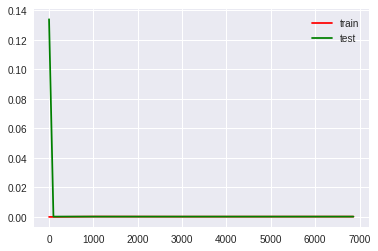

In [63]:
mean_train = -train_score.mean(axis=1)
mean_test = -test_score.mean(axis=1)

plt.plot(train_size, mean_train, 'r-', label='train')
plt.plot(train_size, mean_test, 'g-', label='test')

plt.legend()

plt.show()

In [65]:
pipe3.fit(trainX, trainY)
print(pipe3.score(testX, testY))

0.9987960124180894


In [0]:
from scipy.stats import ttest_ind

In [0]:
t2, p2 = ttest_ind(X, Y)

In [80]:
print(t2)

[ 3.70630187e+02  1.71953930e+02  5.85089708e-02  6.06225058e-02
 -4.98837915e-02  5.82182702e-02  6.01542018e-02]


In [81]:
print(1 - p2)

[1.         1.         0.04665624 0.04833959 0.03978454 0.04642469
 0.04796662]


According to our p-values, the indices are not very important to the outcome (this was excepted due to the correlation).  However, one unexcepted outcome was that only the first 2 features were unimportant.  The corrlation said that the only outcome that was important was the initail w' corrinates.

In [77]:
for a in range(len(data.keys()) - 1):
  print(pipe3.named_steps['ridge'].coef_[a], data.keys()[a])
  

0.00021801036122291942 Chiral indice n
-0.00018619396239904622 Chiral indice m
9.183115816787024e-05 Initial atomic coordinate u
0.0017983509412610567 Initial atomic coordinate v
0.2887122974699214 Initial atomic coordinate w
-0.0005172491662309718 Calculated atomic coordinates u'
-0.001464040945159765 Calculated atomic coordinates v'


The weights on each of the features confirms this, as the first 2 features cause the predictor to go up/down very little.  Also, the initial w coordinate is by far the most important, as it has both the highest p-values (meaning it affects the outcome the most), and it has the highest weight (meaning that a change in this feature makes the outcome change the most).

In [0]:
import pickle

filename = "carbon_nanotubes.sav"

pickle.dump(pipe3, open(filename, 'wb'))